<a href="https://colab.research.google.com/github/SvetlanaSel/Distributed_systems/blob/main/%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 урок


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv')

In [ ]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

In [ ]:
x.head()

,0
0,1.462108
1,1.133769
2,-2.301539
3,1.744812
4,0.042214


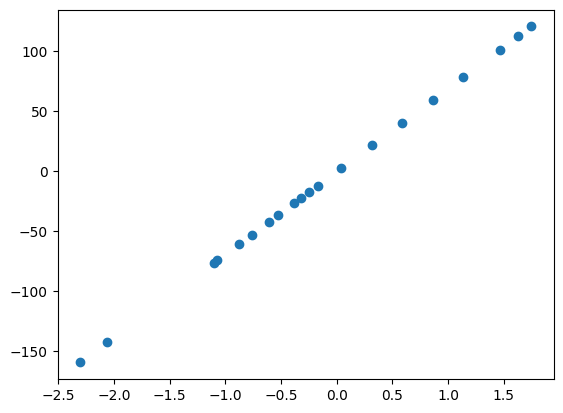

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 0.028262815388801266


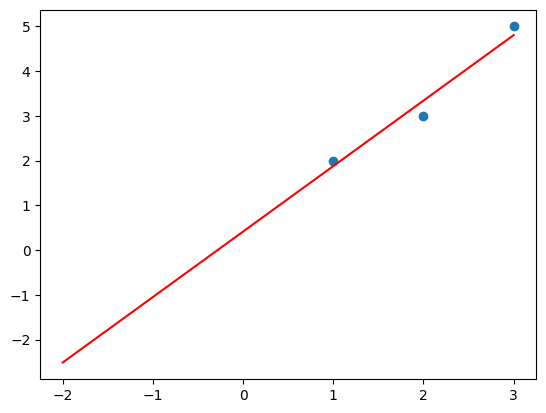

In [ ]:
X0 = np.linspace(3, -2, 10)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

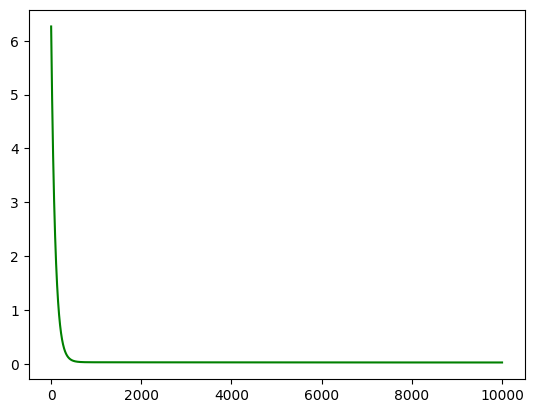

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

Starting with b0=0, b1=0
Stopping early at step 201 with error 0.027818
error after gradient descent: 0.02781834423689351


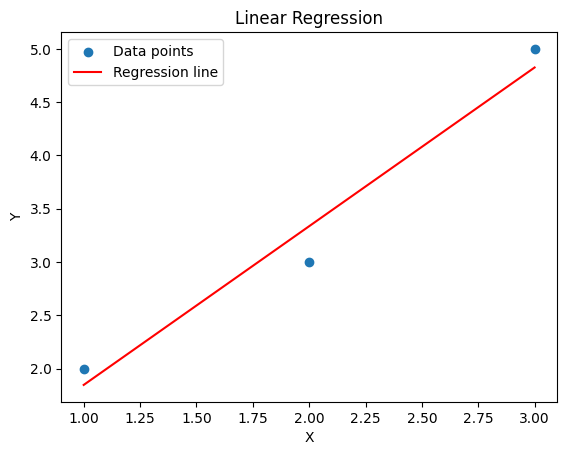

Starting with b0=0, b1=1
Stopping early at step 114 with error 0.027818
error after gradient descent: 0.02781788628647353


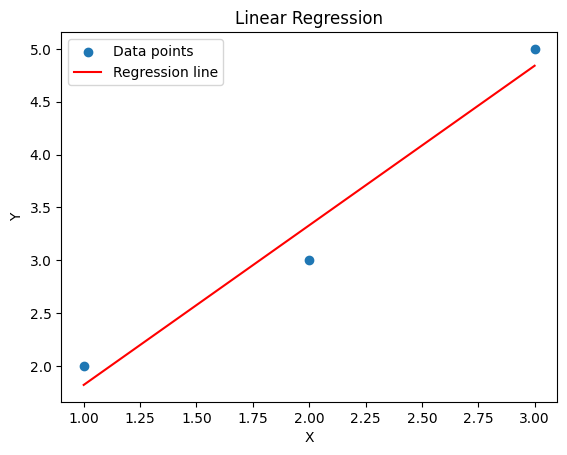

Starting with b0=1, b1=0
Stopping early at step 317 with error 0.027818
error after gradient descent: 0.027818271078742657


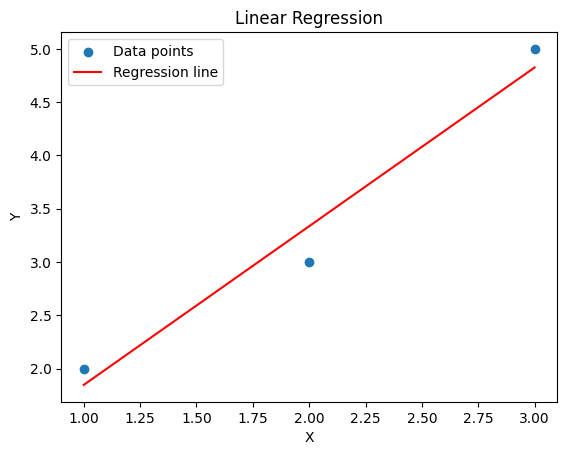

Starting with b0=1, b1=1
Stopping early at step 284 with error 0.027818
error after gradient descent: 0.027817960618134924


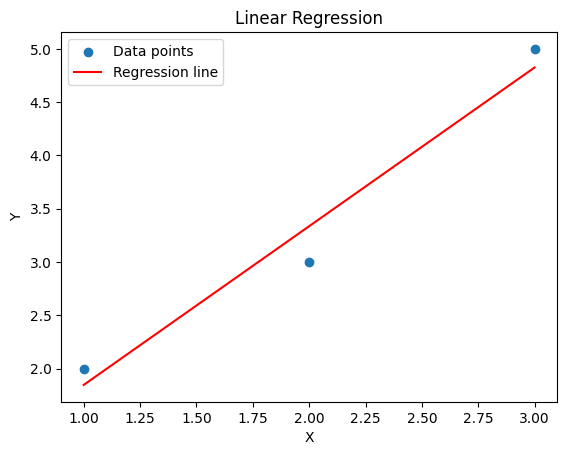

Stopping early at step 201 with error 0.027818
error after gradient descent on DataFrame: 0.02781834423689351


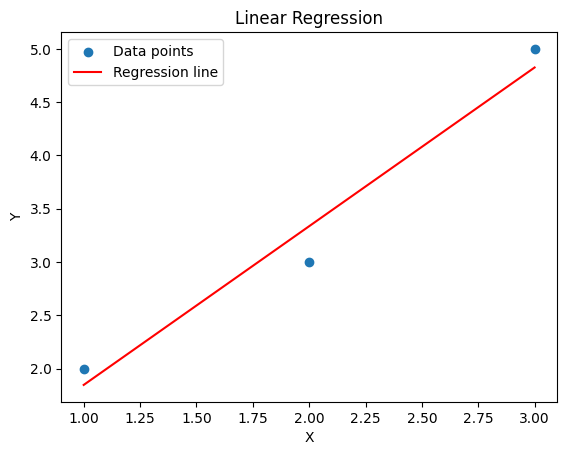

In [ ]:

class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return np.sum((self.predict(X) - Y) ** 2) / (2 * len(X))

    def fit(self, X, Y, alpha=0.1, accuracy=1e-6, max_steps=10000):
        steps, errors = [], []
        step = 0
        previous_error = float('inf')

        while step < max_steps:
            dJ0 = np.sum(self.predict(X) - Y) / len(X)
            dJ1 = np.sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_error = self.error(X, Y)
            steps.append(step)
            errors.append(new_error)

            # Проверка на остановку
            if abs(previous_error - new_error) < accuracy:
                print(f"Stopping early at step {step} with error {new_error:.6f}")
                break

            previous_error = new_error
            step += 1

            # Адаптивная скорость обучения
            if step == 1:  # После первого шага
                if new_error > errors[0]:
                    alpha /= 2  # Уменьшаем скорость обучения

        return steps, errors

    def plot(self, X, Y):
        plt.figure()
        plt.scatter(X, Y, label='Data points')
        X0 = np.linspace(min(X), max(X), 100)
        Y0 = self.predict(X0)
        plt.plot(X0, Y0, 'r', label='Regression line')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

    @staticmethod
    def preprocess_data(data):
        """Преобразует DataFrame или Series в numpy массив."""
        if isinstance(data, pd.DataFrame):
            # Удаляем лишние столбцы и возвращаем только нужные данные
            return data.iloc[:, 0].values  # Предполагаем, что нужные данные в первом столбце
        elif isinstance(data, pd.Series):
            return data.values
        else:
            return np.array(data)

# Пример использования
x = np.array([1, 2, 3])  # Пример данных X
y = np.array([2, 3, 5])  # Пример данных Y

# Проверка с разными начальными значениями параметров
for initial_b0 in [0, 1]:
    for initial_b1 in [0, 1]:
        hyp = Model()
        hyp.b0 = initial_b0
        hyp.b1 = initial_b1
        print(f"Starting with b0={initial_b0}, b1={initial_b1}")

        steps, errors = hyp.fit(x, y)
        J = hyp.error(x, y)
        print("error after gradient descent:", J)

        hyp.plot(x, y)

# Пример работы с DataFrame
df = pd.DataFrame({'X': [1, 2, 3], 'Y': [2, 3, 5]})
X_processed = Model.preprocess_data(df[['X']])
Y_processed = Model.preprocess_data(df['Y'])

hyp = Model()
steps, errors = hyp.fit(X_processed, Y_processed)
J = hyp.error(X_processed, Y_processed)
print("error after gradient descent on DataFrame:", J)
hyp.plot(X_processed, Y_processed)


Stopping early at step 325 with error 0.027815
Custom model score: 0.9642373095803155
Sklearn model score: 0.9642857142857143


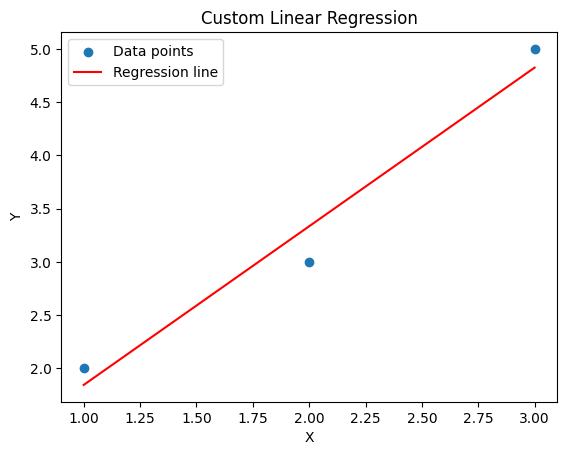

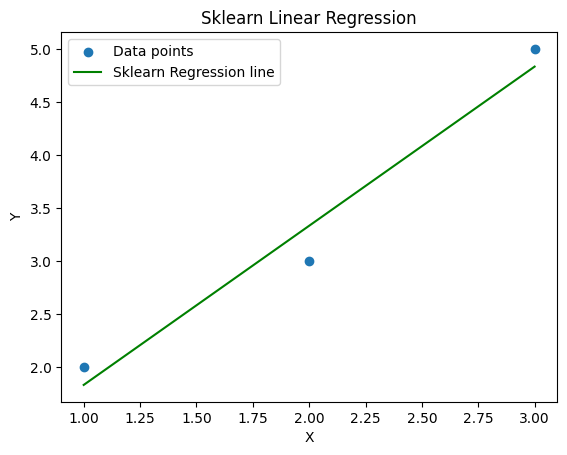

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

class CustomLinearRegression:
    """Кастомная модель линейной регрессии с нормированием"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.scaler = MinMaxScaler()

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return np.sum((self.predict(X) - Y) ** 2) / (2 * len(X))

    def fit(self, X, Y, alpha=0.1, accuracy=1e-6, max_steps=10000):
        # Нормируем входные данные
        X_scaled = self.scaler.fit_transform(X.reshape(-1, 1)).flatten()
        steps, errors = [], []
        step = 0
        previous_error = float('inf')

        while step < max_steps:
            dJ0 = np.sum(self.predict(X_scaled) - Y) / len(X_scaled)
            dJ1 = np.sum((self.predict(X_scaled) - Y) * X_scaled) / len(X_scaled)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_error = self.error(X_scaled, Y)
            steps.append(step)
            errors.append(new_error)

            # Проверка на остановку
            if abs(previous_error - new_error) < accuracy:
                print(f"Stopping early at step {step} with error {new_error:.6f}")
                break

            previous_error = new_error
            step += 1

            # Адаптивная скорость обучения
            if step == 1:  # После первого шага
                if new_error > errors[0]:
                    alpha /= 2  # Уменьшаем скорость обучения

        return steps, errors

    def score(self, X, Y):
        """Оценка качества модели"""
        X_scaled = self.scaler.transform(X.reshape(-1, 1)).flatten()
        predictions = self.predict(X_scaled)
        ss_total = np.sum((Y - np.mean(Y)) ** 2)
        ss_residual = np.sum((Y - predictions) ** 2)
        return 1 - (ss_residual / ss_total)

    def plot(self, X, Y):
        plt.figure()
        plt.scatter(X, Y, label='Data points')
        X0 = np.linspace(min(X), max(X), 100)
        Y0 = self.predict(self.scaler.transform(X0.reshape(-1, 1)).flatten())
        plt.plot(X0, Y0, 'r', label='Regression line')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Custom Linear Regression')
        plt.legend()
        plt.show()

# Пример данных
x = np.array([1, 2, 3])  # Пример данных X
y = np.array([2, 3, 5])  # Пример данных Y

# Использование кастомной модели
custom_model = CustomLinearRegression()
custom_model.fit(x, y)
custom_score = custom_model.score(x, y)
print("Custom model score:", custom_score)

# Использование scikit-learn для линейной регрессии
sklearn_model = LinearRegression()
sklearn_model.fit(x.reshape(-1, 1), y)
sklearn_score = sklearn_model.score(x.reshape(-1, 1), y)
print("Sklearn model score:", sklearn_score)

# Построение графиков
custom_model.plot(x, y)

# Построение графика для sklearn модели
plt.figure()
plt.scatter(x, y, label='Data points')
Y_sklearn_predicted = sklearn_model.predict(x.reshape(-1, 1))
plt.plot(x, Y_sklearn_predicted, 'g', label='Sklearn Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sklearn Linear Regression')
plt.legend()
plt.show()


# урок 3.1
Контрольные вопросы
1. В чем заключается суть метода множественной регрессии?
- Суть метода множественной регрессии заключается в установлении зависимости между одной целевой переменной (зависимой переменной) и несколькими признаками (независимыми переменными). Этот метод позволяет моделировать, как несколько факторов одновременно влияют на результат, что полезно для прогнозирования, анализа и интерпретации взаимосвязей.
2. Какие основные недостатки применения полиномиальных признаков на практике?
- Переобучение: Высокая степень полинома может подгонять модель под шум в данных, снижая обобщающую способность.
- Рост вычислительной сложности: С увеличением степени полинома растет число признаков, что делает обучение ресурсоемким.
- Чувствительность к масштабу данных: Полиномиальные признаки требуют тщательной нормализации для корректной работы модели.
- Проблемы интерпретации: Коэффициенты высоких степеней сложны для анализа и объяснения.
- Склонность к мультиколлинеарности: Полиномиальные признаки могут быть сильно коррелированы, что ухудшает стабильность модели.
3. В каких случая введение полиномиальных признаков может быть полезным?
- Нелинейная зависимость
- Малый объем данных
- Пространство признаков невыразительное: Если исходные признаки недостаточно информативны, полиномиальные признаки могут добавить полезную информацию.
- Простая интерпретация в низких степенях: Полиномы небольшой степени (2 или 3) иногда позволяют интерпретировать зависимости в данных.
- Улучшение линейных моделей: Полиномиальные признаки могут расширить возможности линейных моделей без перехода к более сложным алгоритмам.
4. Как растет требование к объему оперативной памяти при введении полиномиальных признаков?
- Требование к объему оперативной памяти растет комбинаторно с увеличением степени полинома и количества признаков, так как объем данных увеличивается за счет всех возможных комбинаций признаков.
5. Почему при введении полиномиальных признаков нужно добавить все комбинации атрибутов до заданной степени?
- Зависимость может быть не линейной, а квадратичной или включать взаимодействие двух признаков
- Если такие комбинации не добавить, модель не сможет учесть их вклад.
- Полиномиальные признаки дают модели возможность приближать сложные функции (например, кривые, поверхности) вместо ограниченности линейными границами.
- Включение всех степеней до заданной гарантирует, что не упущены потенциально значимые комбинации признаков.
6. Почему на последнем графике линия получается прямая, хотя мы используем нелинейную модель?
Линейный вид графика не обязательно означает, что модель линейная. Это может быть результатом структуры данных, их зависимости, регуляризации или особенностей построения графика.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [38]:
data = pd.read_csv('/content/AmesHousing.csv')  # Замените на фактический путь к файлу
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [39]:
print(data.columns)


Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [40]:
# Выделение столбцов в переменные
X = data['Gr Liv Area']
y = data['SalePrice']

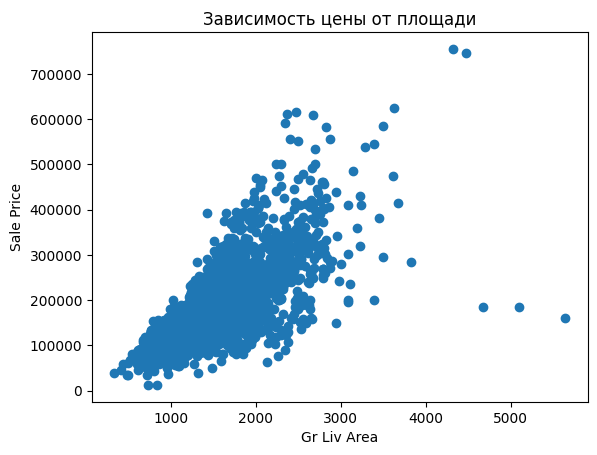

In [41]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel('Gr Liv Area')
plt.ylabel('Sale Price')
plt.title('Зависимость цены от площади')
plt.show()


In [42]:
#Подготовка данных для регрессии
X = pd.DataFrame(X)


In [43]:
#Импорт и обучение модели линейной регрессии
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


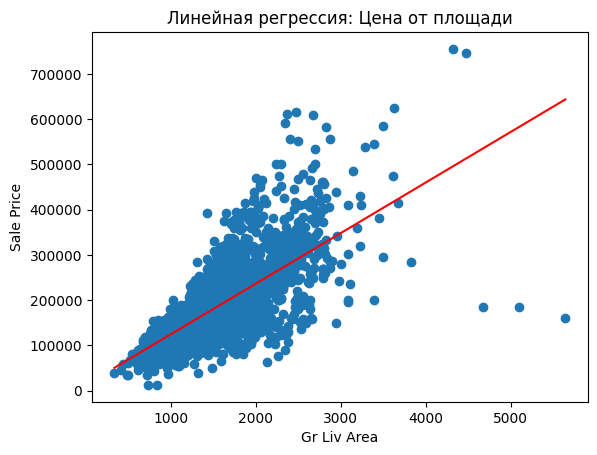

In [44]:
#Построение линии регрессии
xx = np.arange(X['Gr Liv Area'].min(), X['Gr Liv Area'].max()).reshape(-1, 1)  # Приведение к нужной форме
yy = linear.predict(xx)

plt.scatter(X['Gr Liv Area'], y)
plt.plot(xx, yy, c='r')
plt.xlabel('Gr Liv Area')
plt.ylabel('Sale Price')
plt.title('Линейная регрессия: Цена от площади')
plt.show()


In [45]:
linear.score(X, y)

0.49953785669572837

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
# Создание объекта для полиномиальных признаков второго порядка

transformation = PolynomialFeatures(degree=2)

In [48]:
# Обучение объекта трансформации

transformation.fit(X)

PolynomialFeatures()

In [49]:
# Преобразование данных

X_2 = transformation.transform(X)

In [50]:
# Проверка нового датасета

print(X_2.shape)  # Проверка размерности
print(X_2[:5])    # Первые 5 строк

(2930, 3)
[[1.000000e+00 1.656000e+03 2.742336e+06]
 [1.000000e+00 8.960000e+02 8.028160e+05]
 [1.000000e+00 1.329000e+03 1.766241e+06]
 [1.000000e+00 2.110000e+03 4.452100e+06]
 [1.000000e+00 1.629000e+03 2.653641e+06]]


In [51]:
# Обучение модели полиномиальной регрессии:

poly_linear = LinearRegression().fit(X_2, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


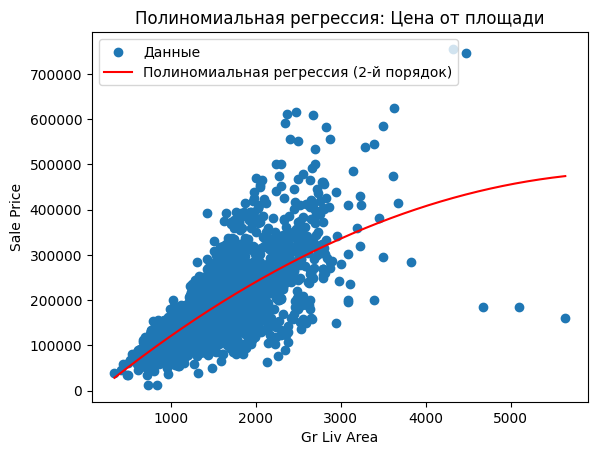

In [52]:
xx = np.arange(X['Gr Liv Area'].min(), X['Gr Liv Area'].max(), 1).reshape(-1, 1)  # Приведение к нужной форме
xx_2 = transformation.transform(xx)  # Преобразование новых данных в полиномиальные признаки
yy_poly = poly_linear.predict(xx_2)

# Построение графика
plt.scatter(X['Gr Liv Area'], y, label='Данные')
plt.plot(xx, yy_poly, c='r', label='Полиномиальная регрессия (2-й порядок)')
plt.xlabel('Gr Liv Area')
plt.ylabel('Sale Price')
plt.title('Полиномиальная регрессия: Цена от площади')
plt.legend()
plt.show()

In [53]:
# Оценка коэффициента детерминации для полиномиальной регрессии

r2_poly = poly_linear.score(X_2, y)
print(f"Коэффициент детерминации для полиномиальной регрессии: {r2_poly:.2f}")

Коэффициент детерминации для полиномиальной регрессии: 0.51


In [54]:
import pandas as pd

# Загрузка данных
data = pd.read_csv("AmesHousing.csv")

In [55]:
# Создание целевой переменной
median_price = data['SalePrice'].median()
data['y'] = (data['SalePrice'] > median_price).astype(int)

# Выделение признаков
X = data[['Gr Liv Area', 'Overall Qual']]
y = data['y']


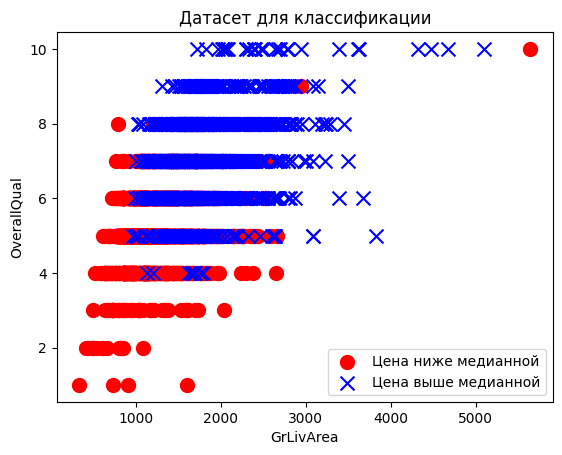

In [56]:
import matplotlib.pyplot as plt

# Визуализация данных
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100, label='Цена ниже медианной')
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100, label='Цена выше медианной')
plt.xlabel('GrLivArea')
plt.ylabel('OverallQual')
plt.title('Датасет для классификации')
plt.legend()
plt.show()


In [57]:
from sklearn.linear_model import LogisticRegression

# Создание и обучение модели
logistic = LogisticRegression()
logistic.fit(X, y)


LogisticRegression()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


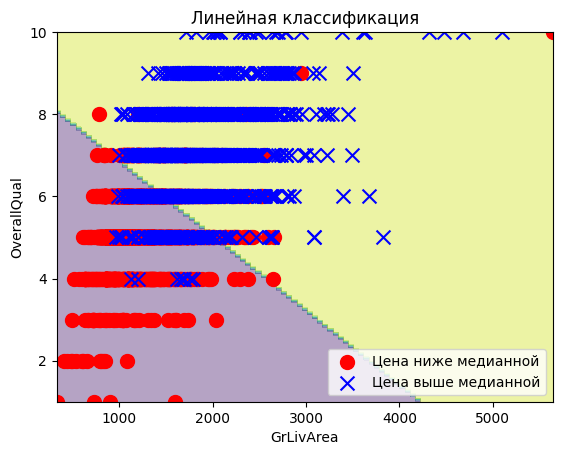

In [58]:
# Построение сетки для контурного графика с меньшим разрешением (иначе проблема с ОЗУ)
xx, yy = np.meshgrid(
    np.arange(X.iloc[:, 0].min(), X.iloc[:, 0].max() + 0.1, 0.1),
    np.arange(X.iloc[:, 1].min(), X.iloc[:, 1].max() + 0.1, 0.1))

# Предсказание классов на сетке
Z = logistic.predict(np.array(list(zip(xx.ravel(), yy.ravel())))).reshape(xx.shape)

# Визуализация границы принятия решения

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y == 0], X.iloc[:, 1][y == 0], marker="o", c='r', s=100, label='Цена ниже медианной')
plt.scatter(X.iloc[:, 0][y == 1], X.iloc[:, 1][y == 1], marker="x", c='b', s=100, label='Цена выше медианной')
plt.xlabel('GrLivArea')
plt.ylabel('OverallQual')
plt.title('Линейная классификация')
plt.legend()
plt.show()

In [59]:
# Оценка точности модели
accuracy = logistic.score(X, y)
print(f"Точность линейной модели: {accuracy:.2f}")


Точность линейной модели: 0.86


In [60]:
from sklearn.preprocessing import PolynomialFeatures

# Создание полиномиальных признаков (степень 3)
poly_transform = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_transform.fit_transform(X)

# Обучение модели логистической регрессии на полиномиальных признаках
class_3 = LogisticRegression()
class_3.fit(X_poly, y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


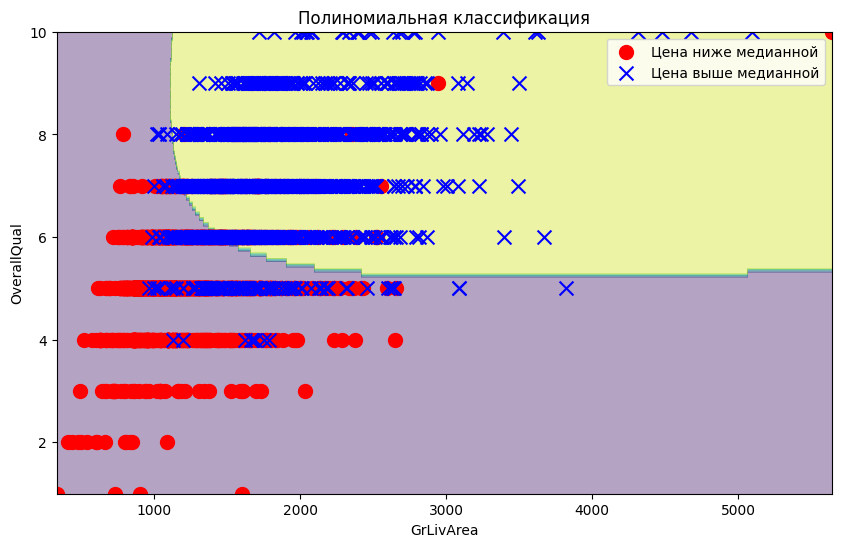

In [61]:
# Предсказание классов на сетке для полиномиальной модели
Z_poly = class_3.predict(poly_transform.transform(np.array(list(zip(xx.ravel(), yy.ravel()))))).reshape(xx.shape)

# Визуализация полиномиальной границы
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_poly, alpha=0.4)
plt.scatter(X.iloc[:, 0][y == 0], X.iloc[:, 1][y == 0], marker="o", c='r', s=100, label='Цена ниже медианной')
plt.scatter(X.iloc[:, 0][y == 1], X.iloc[:, 1][y == 1], marker="x", c='b', s=100, label='Цена выше медианной')
plt.xlabel('GrLivArea')
plt.ylabel('OverallQual')
plt.title('Полиномиальная классификация')
plt.legend()
plt.show()

In [62]:
# Оценка точности полиномиальной модели
accuracy_poly = class_3.score(X_poly, y)
print(f"Точность полиномиальной модели: {accuracy_poly:.2f}")


Точность полиномиальной модели: 0.87


In [63]:
import pandas as pd

# Загрузка данных
data_cleaned = pd.read_csv("AmesHousing.csv")


In [64]:
data_encoded = pd.get_dummies(data_cleaned)

In [65]:
data_encoded = data_encoded.fillna(data_encoded.median())

In [66]:
# Разделение на признаки и целевую переменную
y_kc_prices = data_encoded['SalePrice']
X_kc_prices = data_encoded.drop("SalePrice", axis=1)

# Печать формы получившихся массивов
X_kc_prices.shape, y_kc_prices.shape


((2930, 305), (2930,))

In [67]:
from sklearn.linear_model import LinearRegression

# Создание и обучение линейной регрессионной модели
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)

# Оценка точности модели
accuracy_linear = reg_kc_multiple.score(X_kc_prices, y_kc_prices)
print(f"Точность линейной модели: {accuracy_linear:.2f}")


Точность линейной модели: 0.94


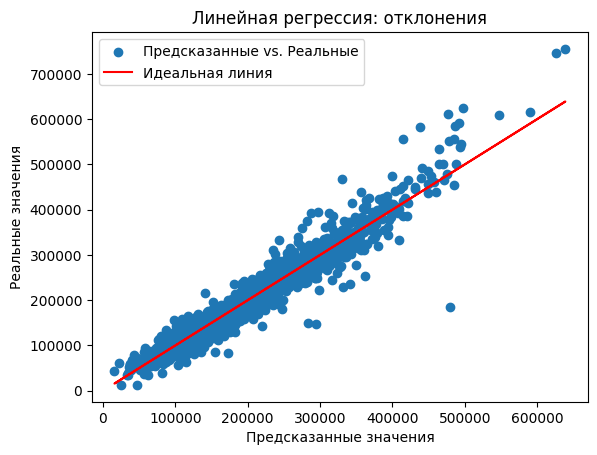

In [68]:
import matplotlib.pyplot as plt

# Предсказания модели
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)

# Визуализация отклонений
plt.scatter(y_pred_kc_prices, y_kc_prices, label='Предсказанные vs. Реальные')
plt.plot(y_pred_kc_prices, y_pred_kc_prices, color='red', label='Идеальная линия')
plt.xlabel('Предсказанные значения')
plt.ylabel('Реальные значения')
plt.title('Линейная регрессия: отклонения')
plt.legend()
plt.show()


In [69]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [70]:
# Линейная модель для парной регрессии: замер времени
start_time = time.time()
linear = LinearRegression().fit(X, y)
linear_training_time = time.time() - start_time
print(f"Время обучения линейной модели (парная регрессия): {linear_training_time:.4f} секунд")

Время обучения линейной модели (парная регрессия): 0.0058 секунд


In [71]:
start_time = time.time()
poly_model = LinearRegression().fit(X_poly, y)
poly_training_time = time.time() - start_time
print(f"Время обучения полиномиальной модели (парная регрессия): {poly_training_time:.4f} секунд")

Время обучения полиномиальной модели (парная регрессия): 0.0032 секунд


In [72]:
# Линейная модель для классификации: замер времени
start_time = time.time()
logistic = LogisticRegression().fit(X, y)
logistic_training_time = time.time() - start_time
print(f"Время обучения линейной модели (классификация): {logistic_training_time:.4f} секунд")

Время обучения линейной модели (классификация): 0.0275 секунд


In [73]:
start_time = time.time()
logistic_poly = LogisticRegression(max_iter=1000).fit(X_poly, y)
logistic_poly_training_time = time.time() - start_time
print(f"Время обучения полиномиальной модели (классификация): {logistic_poly_training_time:.4f} секунд")

Время обучения полиномиальной модели (классификация): 0.0740 секунд


In [74]:
# Линейная модель: замер времени
start_time = time.time()
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
linear_training_time = time.time() - start_time
print(f"Время обучения линейной модели: {linear_training_time:.4f} секунд")

Время обучения линейной модели: 0.0981 секунд


Полином 5-го порядка: время обучения = 0.0112 секунд, точность R² = 0.9217
Полином 10-го порядка: время обучения = 0.0106 секунд, точность R² = 0.9232
Полином 100-го порядка: время обучения = 0.3468 секунд, точность R² = 0.7925


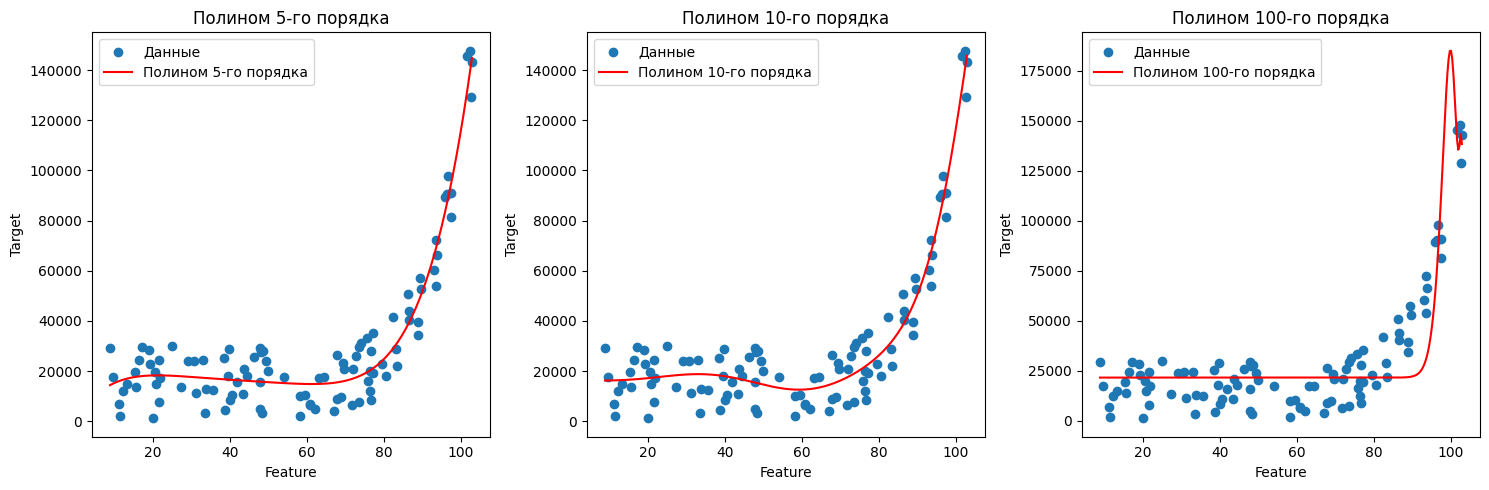

In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import time

# Шаг 1: Загрузка данных
data_gen_reg = pd.read_csv('/content/gen_regression.csv')
X = data_gen_reg[["x"]]
y = data_gen_reg["y"]

# Функция для построения полиномиальной модели и замера времени обучения
def build_poly_model(degree, X, y):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Замер времени обучения
    start_time = time.time()
    model = LinearRegression().fit(X_poly, y)
    training_time = time.time() - start_time

    # Предсказание и оценка модели
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)

    print(f"Полином {degree}-го порядка: время обучения = {training_time:.4f} секунд, точность R² = {r2:.4f}")
    return model, X_poly, y_pred

# Шаг 2: Построение моделей 5-го, 10-го и 100-го порядков и замер времени и точности
degrees = [5, 10, 100]
models = {}

for degree in degrees:
    models[degree] = build_poly_model(degree, X, y)

# Шаг 3: Визуализация результатов для каждой модели
xx = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

plt.figure(figsize=(15, 5))
for i, degree in enumerate(degrees, 1):
    plt.subplot(1, 3, i)
    plt.scatter(X, y, label="Данные")
    yy_pred = models[degree][0].predict(PolynomialFeatures(degree=degree).fit_transform(xx))
    plt.plot(xx, yy_pred, label=f"Полином {degree}-го порядка", color="red")
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.title(f"Полином {degree}-го порядка")
    plt.legend()

plt.tight_layout()
plt.show()


Полином 2-го порядка: время обучения = 0.0033 секунд, точность R² = 0.5327
Полином 3-го порядка: время обучения = 0.0094 секунд, точность R² = 0.5390
Полином 5-го порядка: время обучения = 0.0155 секунд, точность R² = 0.5436


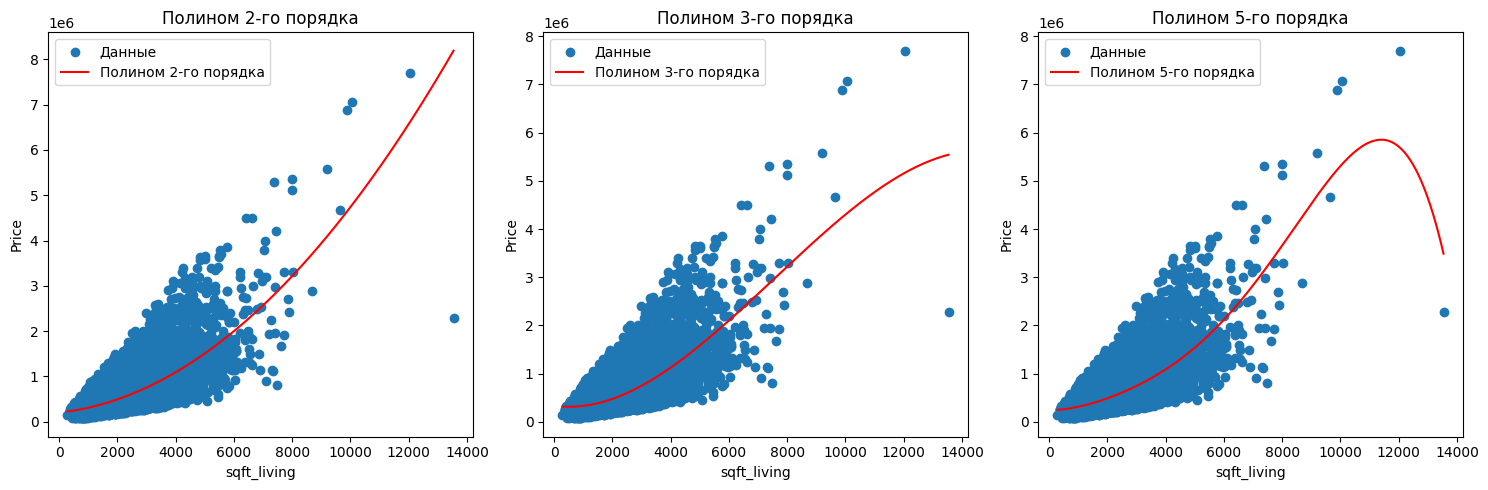

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import time

# Шаг 1: Загрузка данных King County
data_kc = pd.read_csv("/content/kc_house_data.csv")
data_kc = data_kc.dropna(subset=["price"])  # Удаляем строки без цены

# Удаляем бесконечные значения и NaN
data_kc = data_kc[np.isfinite(data_kc["price"])]
data_kc = data_kc[np.isfinite(data_kc["sqft_living"])]

# Для примера используем только sqft_living как предиктор
X_kc = data_kc[["sqft_living"]]
y_kc = data_kc["price"]

# Функция для построения полиномиальной модели и замера времени обучения
def build_poly_model(degree, X, y):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Замер времени обучения
    start_time = time.time()
    model = LinearRegression().fit(X_poly, y)
    training_time = time.time() - start_time

    # Предсказание и оценка модели
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)

    print(f"Полином {degree}-го порядка: время обучения = {training_time:.4f} секунд, точность R² = {r2:.4f}")
    return model, X_poly, y_pred

# Шаг 2: Построение моделей 2-го, 3-го и 5-го порядков
degrees_kc = [2, 3, 5]
models_kc = {}

for degree in degrees_kc:
    models_kc[degree] = build_poly_model(degree, X_kc, y_kc)

# Шаг 3: Визуализация результатов для каждой модели
xx_kc = np.linspace(X_kc.min(), X_kc.max(), 300).reshape(-1, 1)

plt.figure(figsize=(15, 5))
for i, degree in enumerate(degrees_kc, 1):
    plt.subplot(1, 3, i)
    plt.scatter(X_kc, y_kc, label="Данные")
    yy_pred_kc = models_kc[degree][0].predict(PolynomialFeatures(degree=degree).fit_transform(xx_kc))
    plt.plot(xx_kc, yy_pred_kc, label=f"Полином {degree}-го порядка", color="red")
    plt.xlabel("sqft_living")
    plt.ylabel("Price")
    plt.title(f"Полином {degree}-го порядка")
    plt.legend()

plt.tight_layout()
plt.show()


Таблица эффективности моделей для задачи регрессии:
   Degree  Training Time (s)        R²
0       1           0.002724  0.374674
1       2           0.003074  0.735975
2       3           0.002625  0.897448
3       5           0.002122  0.921748
4      10           0.002024  0.923200

Таблица эффективности моделей для King County:
   Degree  Training Time (s)        R²
0       1           0.003989  0.492853
1       2           0.003731  0.532743
2       3           0.004506  0.539005
3       5           0.015551  0.543598


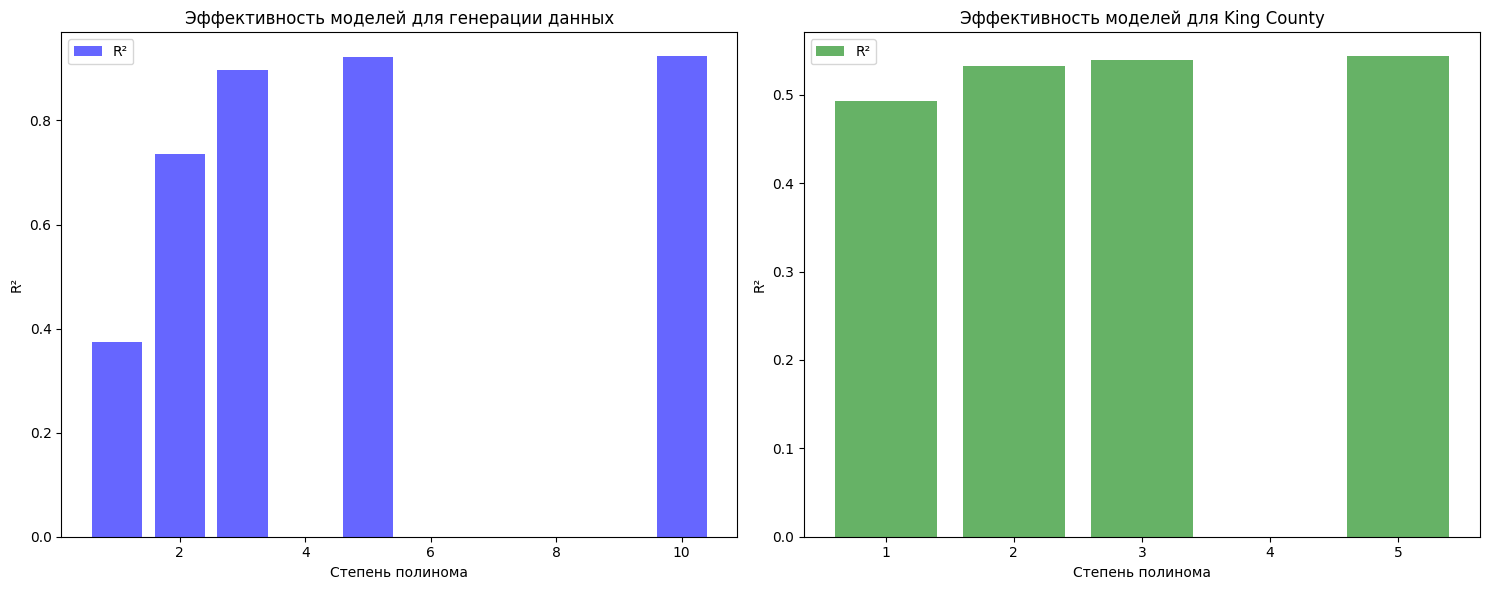

In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import time

# Функция для построения полиномиальной модели и замера времени обучения
def build_poly_model(degree, X, y):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Замер времени обучения
    start_time = time.time()
    model = LinearRegression().fit(X_poly, y)
    training_time = time.time() - start_time

    # Предсказание и оценка модели
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)

    return training_time, r2

# Загрузка данных для регрессии
data_gen_reg = pd.read_csv("gen_regression.csv")
X = data_gen_reg[["x"]]
y = data_gen_reg["y"]

# Построение моделей для генерации данных
degrees_reg = [1, 2, 3, 5, 10]
results_reg = []

for degree in degrees_reg:
    training_time, r2 = build_poly_model(degree, X, y)
    results_reg.append({"Degree": degree, "Training Time (s)": training_time, "R²": r2})

# Создание DataFrame для таблицы результатов
results_df_reg = pd.DataFrame(results_reg)

# Загрузка данных King County
data_kc = pd.read_csv("/content/kc_house_data.csv")
data_kc = data_kc.dropna(subset=["price"])
data_kc = data_kc[np.isfinite(data_kc["price"]) & np.isfinite(data_kc["sqft_living"])]

X_kc = data_kc[["sqft_living"]]
y_kc = data_kc["price"]

# Построение моделей для King County
degrees_kc = [1, 2, 3, 5]
results_kc = []

for degree in degrees_kc:
    training_time, r2 = build_poly_model(degree, X_kc, y_kc)
    results_kc.append({"Degree": degree, "Training Time (s)": training_time, "R²": r2})

# Создание DataFrame для таблицы результатов King County
results_df_kc = pd.DataFrame(results_kc)

# Вывод таблиц результатов
print("Таблица эффективности моделей для задачи регрессии:")
print(results_df_reg)

print("\nТаблица эффективности моделей для King County:")
print(results_df_kc)

# Визуализация результатов
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.bar(results_df_reg["Degree"], results_df_reg["R²"], color='blue', alpha=0.6, label='R²')
plt.ylabel("R²")
plt.xlabel("Степень полинома")
plt.title("Эффективность моделей для генерации данных")
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(results_df_kc["Degree"], results_df_kc["R²"], color='green', alpha=0.6, label='R²')
plt.ylabel("R²")
plt.xlabel("Степень полинома")
plt.title("Эффективность моделей для King County")
plt.legend()

plt.tight_layout()
plt.show()


In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Загрузка данных King County
data_kc = pd.read_csv("/content/kc_house_data.csv")

# Удаление строк с отсутствующими значениями в целевой переменной
data_kc = data_kc.dropna(subset=["price"])

# Определение матрицы признаков и целевой переменной
X_kc = data_kc.drop(columns=["id", "date", "price"])  # Удаляем ненужные столбцы
y_kc = data_kc["price"]

# Создание и обучение модели линейной регрессии
model_kc = LinearRegression().fit(X_kc, y_kc)

# Получение коэффициентов и названий признаков
coefficients = model_kc.coef_
feature_names = X_kc.columns

# Создание DataFrame для представления коэффициентов
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Сортировка по абсолютным значениям коэффициентов для оценки важности
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

# Вывод коэффициентов
print("Коэффициенты линейной модели для задачи о продаже домов:")
print(coef_df[['Feature', 'Coefficient']])

# Вывод наиболее важных признаков
print("\nНаиболее важные признаки:")
print(coef_df.head())


Коэффициенты линейной модели для задачи о продаже домов:
          Feature    Coefficient
14            lat  602748.226449
5      waterfront  582960.458423
15           long -214729.828253
8           grade   95890.445151
6            view   52870.942384
1       bathrooms   41144.278532
0        bedrooms  -35766.541444
7       condition   26385.649139
4          floors    6689.550115
11       yr_built   -2620.223211
13        zipcode    -582.419866
2     sqft_living     110.442865
9      sqft_above      70.785224
10  sqft_basement      39.657640
16  sqft_living15      21.681400
12   yr_renovated      19.812584
17     sqft_lot15      -0.382642
3        sqft_lot       0.128598

Наиболее важные признаки:
       Feature    Coefficient  Absolute Coefficient
14         lat  602748.226449         602748.226449
5   waterfront  582960.458423         582960.458423
15        long -214729.828253         214729.828253
8        grade   95890.445151          95890.445151
6         view   52870.942384

In [34]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Загрузка данных King County
data_kc = pd.read_csv("/content/kc_house_data.csv")

# Удаление строк с отсутствующими значениями в целевой переменной
data_kc = data_kc.dropna(subset=["price"])

# Определение матрицы признаков и целевой переменной
X_kc = data_kc.drop(columns=["id", "date", "price"])  # Удаляем ненужные столбцы
y_kc = data_kc["price"]

# Создание полиномиальных признаков
poly_features = PolynomialFeatures(degree=3)  # Выбор степени полинома
X_poly = poly_features.fit_transform(X_kc)

# Создание и обучение модели линейной регрессии на полиномиальных признаках
model_poly = LinearRegression().fit(X_poly, y_kc)

# Получение коэффициентов и названий признаков
coefficients_poly = model_poly.coef_
feature_names_poly = poly_features.get_feature_names_out(X_kc.columns)

# Создание DataFrame для представления коэффициентов
coef_poly_df = pd.DataFrame({'Feature': feature_names_poly, 'Coefficient': coefficients_poly})

# Сортировка по абсолютным значениям коэффициентов для оценки важности
coef_poly_df['Absolute Coefficient'] = coef_poly_df['Coefficient'].abs()
coef_poly_df = coef_poly_df.sort_values(by='Absolute Coefficient', ascending=False)

# Вывод коэффициентов
print("Коэффициенты полиномиальной модели для задачи о продаже домов:")
print(coef_poly_df[['Feature', 'Coefficient']])

# Вывод наиболее важных признаков
print("\nНаиболее важные признаки:")
print(coef_poly_df.head())


Коэффициенты полиномиальной модели для задачи о продаже домов:
                      Feature   Coefficient
640         sqft_living lat^2 -8.713357e+02
1200         sqft_above lat^2 -8.102816e+02
1312      lat^2 sqft_living15 -5.895869e+02
641      sqft_living lat long -5.372046e+02
1201      sqft_above lat long -5.158319e+02
...                       ...           ...
659   sqft_lot^2 yr_renovated  3.183445e-10
769     sqft_lot sqft_lot15^2  7.022383e-12
1329             sqft_lot15^3 -4.784395e-12
664     sqft_lot^2 sqft_lot15  3.182121e-12
650                sqft_lot^3 -2.061351e-12

[1330 rows x 2 columns]

Наиболее важные признаки:
                   Feature  Coefficient  Absolute Coefficient
640      sqft_living lat^2  -871.335655            871.335655
1200      sqft_above lat^2  -810.281642            810.281642
1312   lat^2 sqft_living15  -589.586896            589.586896
641   sqft_living lat long  -537.204628            537.204628
1201   sqft_above lat long  -515.831926        

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import time

# Шаг 1: Загрузка данных
data_kc_prices = pd.read_csv("/content/kc_house_data.csv")
X_kc = data_kc_prices.drop(["id", "date", "price"], axis=1)
y_kc = data_kc_prices["price"]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_kc, y_kc, test_size=0.2, random_state=42)

# Снижение степени полинома до 1-4 для уменьшения времени выполнения
degrees_kc = [1, 2, 3, 4]  # Используем только до 4 степени
results_kc = []

def build_poly_model(degree, X_train, y_train, X_test, y_test):
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Замер времени обучения
    start_time = time.time()
    model = LinearRegression().fit(X_train_poly, y_train)
    training_time = time.time() - start_time

    # Предсказание и оценка модели
    y_pred = model.predict(X_test_poly)
    r2 = r2_score(y_test, y_pred)

    return degree, training_time, r2

# Построение моделей и получение результатов
for degree in degrees_kc:
    results_kc.append(build_poly_model(degree, X_train, y_train, X_test, y_test))

# Создание таблицы сравнения
results_df_kc = pd.DataFrame(results_kc, columns=['Degree', 'Training Time (s)', 'R² Score'])
print(results_df_kc)

In [36]:
from sklearn.datasets import load_wine
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Загрузка данных
wine = load_wine()
X_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
y_wine = wine.target

# Создание конвейера
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Масштабирование данных
    ('poly', PolynomialFeatures()),
    ('log_reg', LogisticRegression(solver='liblinear', max_iter=10000, tol=1e-3))  # Увеличьте max_iter и установите tol
])

# Настройка сетки параметров
param_grid = {
    'poly__degree': [1, 2, 3]  # Используйте степени 1, 2 и 3
}

# Поиск по сетке
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_wine, y_wine)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая точность: {grid_search.best_score_:.4f}")


Лучшие параметры: {'poly__degree': 1}
Лучшая точность: 0.9889


In [37]:
from sklearn.datasets import load_digits

# Загрузка данных
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Создание полиномиальных признаков
poly = PolynomialFeatures(degree=2)
X_digits_poly = poly.fit_transform(X_digits)

print(f"Исходные данные: {X_digits.shape}")
print(f"Полиномиальные признаки: {X_digits_poly.shape}")


Исходные данные: (1797, 64)
Полиномиальные признаки: (1797, 2145)


# урок 3.2
Контрольные вопросы

1. Чем отличается класс SVC и LinearSVC в библиотеке sklearn при использовании метода опорных векторов без ядра?

- SVC использует более общий алгоритм для SVM, подходит для любых ядер, включая линейное. При использовании линейного ядра работает так же, как и LinearSVC, но может быть медленнее.

- LinearSVC оптимизирован для работы только с линейным ядром и использует более эффективный метод оптимизации (метод стохастического градиентного спуска), что делает его быстрее на больших датасетах.
2. Чем отличается метод опорных векторов с разными ядрами? Как выбор функции ядра влияет на форму границы принятия решения?

- Линейное ядро:

Граница решения: Прямая или гиперплоскость.
Используется, когда данные линейно разделимы или почти линейно разделимы.
- Полиномиальное ядро:

Граница решения: Кривая, которая может быть сложной, в зависимости от степени полинома.
Полезно для данных, которые не могут быть разделены прямой, но могут быть разделены с помощью кривой.
- Гауссово (RBF) ядро:

Граница решения: Сложная, часто «волнообразная» и гибкая, может адаптироваться к данным с произвольной формой.
Очень мощное ядро, которое может работать с сильно перекрывающимися классами, создает зазор вокруг каждого класса.
3. Как метод опорных векторов работает в задачах множественной классификации?

Метод опорных векторов (SVM) для задач множественной классификации обычно реализуется с помощью подходов "один против всех" (OvA) или "один против одного" (OvO).

- Один против всех (OvA):

Для каждого класса строится отдельный классификатор, который отличает данный класс от всех остальных.
В результате получается столько классификаторов, сколько классов в задаче.
Для классификации нового примера каждый классификатор выдает вероятность принадлежности к своему классу, а итоговое решение принимает классификатор с наибольшей вероятностью.

- Один против одного (OvO):

Для каждой пары классов строится отдельный классификатор, то есть общее количество классификаторов равно числу пар классов.
В процессе классификации каждый классификатор решает, какой из двух классов относится к примеру, и итоговое решение принимается большинством голосов.
В библиотеке scikit-learn класс SVC автоматически использует подход OvA для многоклассовых задач, если количество классов больше двух.

Метод опорных векторов с различными ядрами (например, линейное или RBF) может быть применен для многоклассовой классификации, где границы решений между классами будут учитывать все возможные разделения.
4. Как метод опорных векторов может быть использован для решения задачи регрессии?

Метод опорных векторов (SVM) может быть использован для решения задачи регрессии. В этом случае метод известен как «опорно-векторная регрессия».

Принцип работы заключается в поиске гиперплоскости, при которой риск в многомерном пространстве будет минимальным. По сравнению с традиционной регрессионной моделью SVM оценивает коэффициенты путём минимизации квадратичных потерь. Так, если прогнозное значение попадает в область гиперплоскости, то потери равны нулю, в противном случае — разности прогнозного и фактического значений.

Если данные расположены так, что нельзя провести прямую линию, которая бы чётко разделила их на две группы. Например, если точки расположены в виде окружности, то прямая линия не сможет их разделить на внутренние и внешние. В этом случае SVM может использовать нелинейные функции для преобразования данных в более высокоразмерное пространство.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import time
from sklearn.datasets import make_blobs

# Генерация данных
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

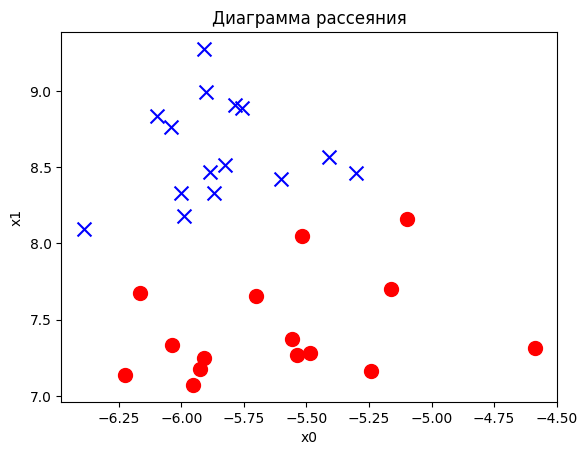

In [5]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [8]:
from sklearn.svm import SVC  # Импортируем класс SVC
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

In [9]:
svm_linear.coef_

array([[-2.49920793,  6.14683189]])

In [10]:
svm_linear.intercept_

array([-64.2533988])

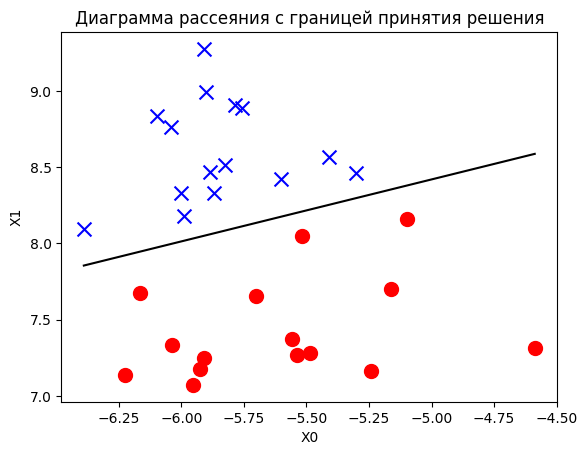

In [11]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [12]:
svm_linear.support_vectors_

array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

In [13]:
svm_linear.support_

array([ 0,  8, 29], dtype=int32)

In [14]:
svm_linear.n_support_

array([1, 2], dtype=int32)

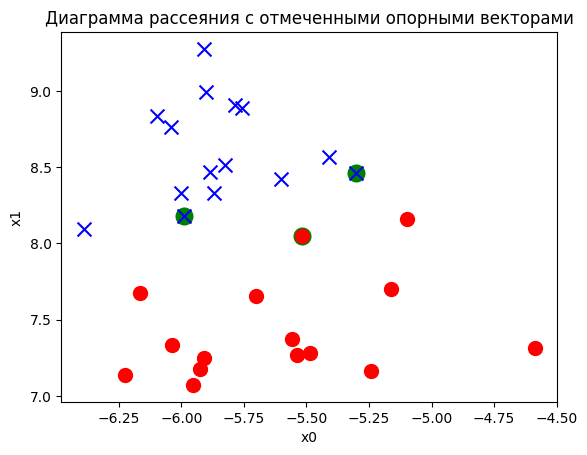

In [15]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

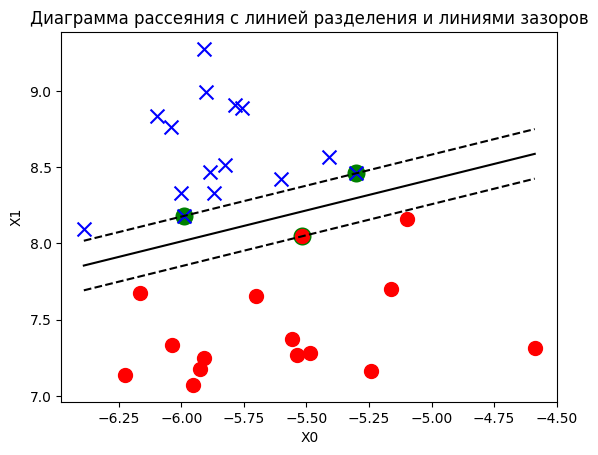

In [16]:
plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')
plt.plot(X0,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

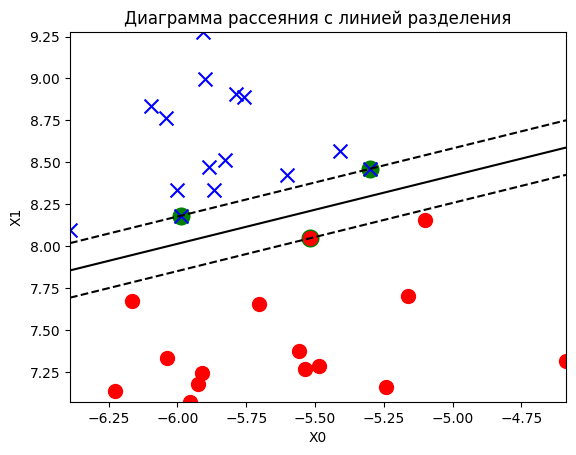

In [17]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [18]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

In [19]:
y_pred =  svm_linear.predict(X)

In [21]:
from sklearn import metrics  # Импортируем модуль metrics
metrics.accuracy_score(y, y_pred)

1.0

In [22]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

In [23]:
observation_new = [[-5.25, 7.5]]

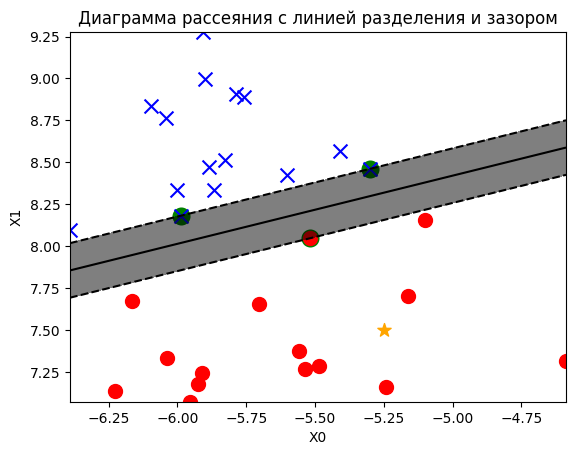

In [24]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [25]:
svm_linear.decision_function(observation_new)

array([-5.03131797])

In [26]:
svm_linear.predict(observation_new)

array([0])

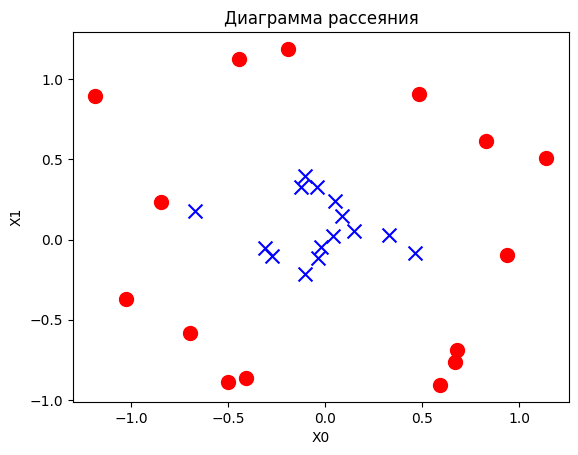

In [28]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [29]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)

In [30]:
svm_rbf.n_support_
svm_rbf.support_
svm_rbf.support_vectors_

array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

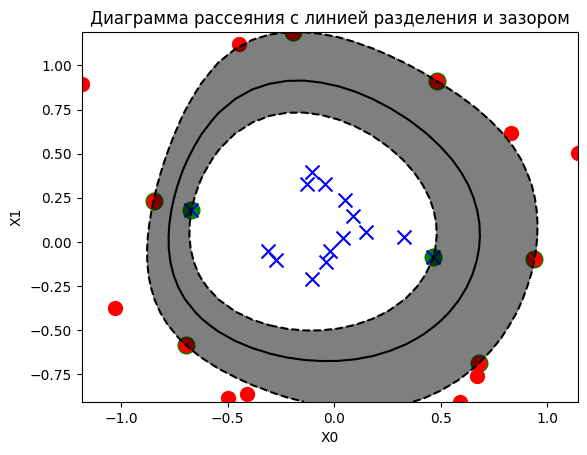

In [31]:
plot_decision_regions(X, y, svm_rbf)

In [32]:
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)

array([[7, 8],
       [8, 7]])

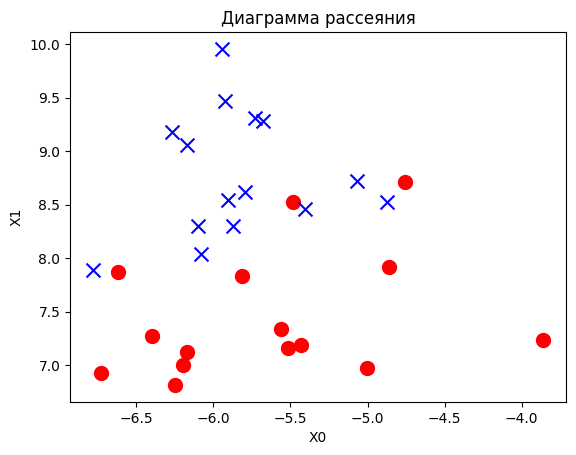

In [33]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [34]:
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y)

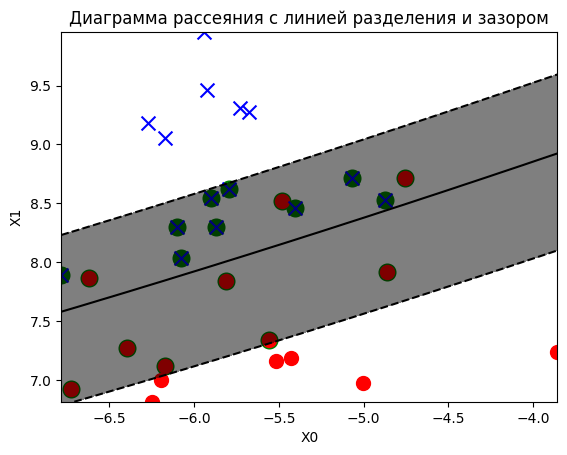

In [35]:
plot_decision_regions(X, y, svm_poly)

In [36]:
svm_poly.n_support_

array([9, 9], dtype=int32)

In [38]:
example_array = np.array([9, 9], dtype=np.int32)

In [39]:
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

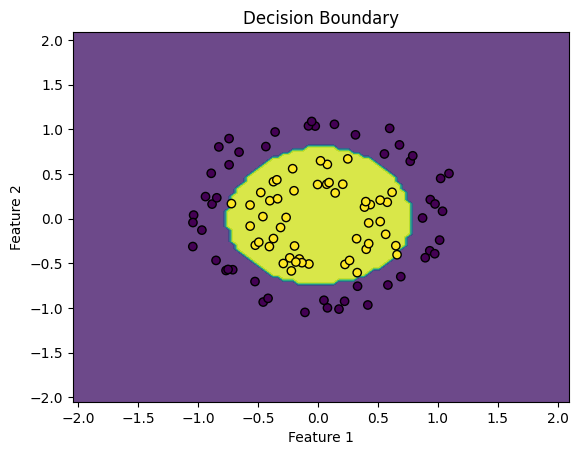

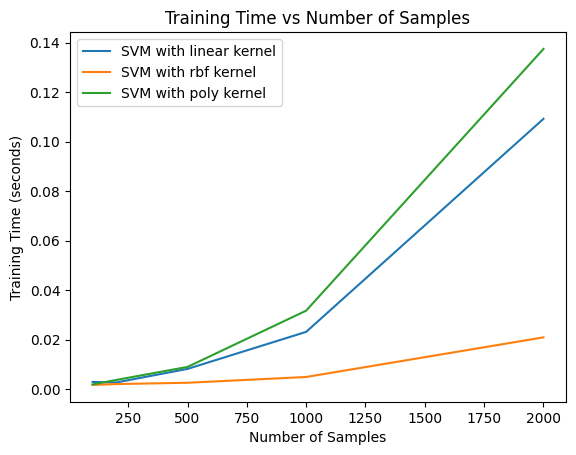

Accuracy of Classifiers:
SVM (RBF): 1.00
Random Forest: 0.99
Logistic Regression: 0.47


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

# Функция для визуализации границы принятия решения
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title("Decision Boundary")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Функция для измерения времени обучения SVM
def measure_training_time(n_samples):
    X, y = make_circles(n_samples=n_samples, noise=0.1, factor=0.5)

    kernels = ['linear', 'rbf', 'poly']
    times = {}

    for kernel in kernels:
        svm = SVC(kernel=kernel)
        start_time = time.time()
        svm.fit(X, y)
        end_time = time.time()
        times[kernel] = end_time - start_time

    return times

# Сравнение производительности различных классификаторов
def compare_classifiers(X_train, X_test, y_train, y_test):
    classifiers = {
        'SVM (RBF)': SVC(kernel='rbf'),
        'Random Forest': RandomForestClassifier(),
        'Logistic Regression': LogisticRegression()
    }

    accuracies = {}

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracies[name] = accuracy_score(y_test, y_pred)

    return accuracies

# Основной код
if __name__ == "__main__":
    # Визуализация границы принятия решения
    X, y = make_circles(n_samples=100, noise=0.1, factor=0.5)
    svm = SVC(kernel='rbf')
    svm.fit(X, y)
    plot_decision_boundary(svm, X, y)

    # Измерение времени обучения
    sample_sizes = [100, 200, 500, 1000, 2000]
    training_times = {}

    for n in sample_sizes:
        training_times[n] = measure_training_time(n)

    # Визуализация времени обучения
    for kernel in training_times[100].keys():
        times = [training_times[n][kernel] for n in sample_sizes]
        plt.plot(sample_sizes, times, label=f'SVM with {kernel} kernel')

    plt.xlabel('Number of Samples')
    plt.ylabel('Training Time (seconds)')
    plt.title('Training Time vs Number of Samples')
    plt.legend()
    plt.show()

    # Сравнение производительности классификаторов
    X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    accuracies = compare_classifiers(X_train, X_test, y_train, y_test)

    # Вывод результатов
    print("Accuracy of Classifiers:")
    for name, accuracy in accuracies.items():
        print(f"{name}: {accuracy:.2f}")


# урок 3.3
Ответы на контрольные вопросы

1. Что называют глубокой нейронной сетью?
   Глубокой нейронной сетью называют нейронную сеть с двумя и более скрытыми слоями.

2. Что такое архитектура нейронной сети?
   Архитектура сети — это структура нейронной сети, включающая количество слоев, нейронов в каждом слое и типы связей между ними.

3. Как количество нейронов и слоев влияет на качество моделирования?
   Увеличение количества нейронов и слоев может повысить способность сети моделировать сложные зависимости, но может привести к переобучению и увеличению времени обучения.

4. Как нейронная сеть решает задачи множественной классификации?
   Для решения задач множественной классификации нейронная сеть использует выходной слой с количеством нейронов, равным числу классов, и функцию активации softmax.

5. В каких случаях следует применять перцептрон?
   Перцептрон применяют для задач классификации и регрессии, когда важны скорость обучения и интерпретируемость модели.


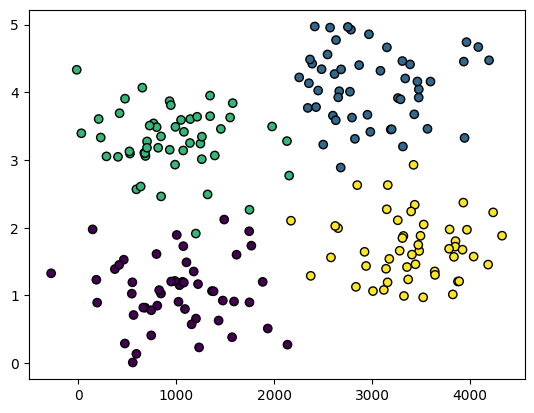

In [41]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200,
                          centers=blob_centers,
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [43]:
from sklearn.neural_network import MLPClassifier  # Импортируем MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=1).fit(X, y)

In [44]:
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [45]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.09809877 -0.58903611], 
0 1 [ 0.33667051 -0.31219238], 
0 2 [-0.82024119 -0.22424296], 
0 3 [-0.29720839  0.11423652], 
0 4 [-0.56852789 -0.18324369], 
0 5 [-0.66056109  0.37321781], 

1 0 [-0.51316658 -0.24370005 -0.59713359 -0.5769702   0.34285864 -0.7006119 ], 
1 1 [-0.43365467  0.34328608 -0.67678056 -0.10221922 -0.25645017  0.35515533], 
1 2 [ 0.43189995  0.57835494 -0.46609801  0.75476969  0.33417991  0.80295119], 
1 3 [0.68148414 0.57889271 0.54011704 0.00610289 0.47281254 0.33880635], 



In [46]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.55752645  0.60978582 -0.8640854   0.33258994 -0.18652436  0.05696655]

Веса смещения для выходного слоя:
[-0.29413473  0.49414359 -0.60792984 -0.11888525]


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, clf.predict(X))

array([[ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50]])

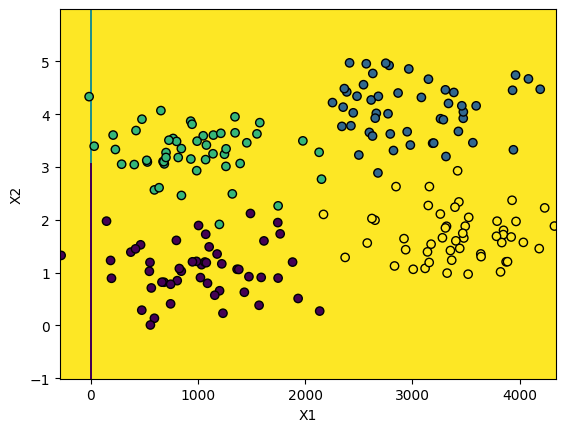

In [50]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 1.73205081 -0.74661159 -0.16257834 -0.12536783]
 [-0.57735027  1.7204528  -0.75869894 -0.4387874 ]
 [-0.57735027 -0.55184335  1.67997623 -1.06562654]
 [-0.57735027 -0.42199786 -0.75869894  1.62978177]]


In [77]:
X = np.array([[22,  0, 11, 17],
       [ 0, 38,  0, 12],
       [ 0,  3, 45,  2],
       [ 0,  5,  0, 45]])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 1.73205081 -0.74661159 -0.16257834 -0.12536783]
 [-0.57735027  1.7204528  -0.75869894 -0.4387874 ]
 [-0.57735027 -0.55184335  1.67997623 -1.06562654]
 [-0.57735027 -0.42199786 -0.75869894  1.62978177]]


In [74]:
X = np.random.rand(200, 10)  # 200 образцов и 10 признаков
y = np.random.randint(0, 2, size=(200,))  # 200 меток классов (например, бинарная классификация)

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Обучение модели
clf = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10_000, verbose=True)
clf.fit(X_train, y_train)

# Проверка точности на тестовой выборке
accuracy = clf.score(X_test, y_test)
print(f"Точность модели: {accuracy}")

Iteration 1, loss = 0.72545638
Iteration 2, loss = 0.72473401
Iteration 3, loss = 0.72401599
Iteration 4, loss = 0.72330308
Iteration 5, loss = 0.72260849
Iteration 6, loss = 0.72193064
Iteration 7, loss = 0.72126000
Iteration 8, loss = 0.72059250
Iteration 9, loss = 0.71991502
Iteration 10, loss = 0.71924097
Iteration 11, loss = 0.71856989
Iteration 12, loss = 0.71790233
Iteration 13, loss = 0.71723888
Iteration 14, loss = 0.71658215
Iteration 15, loss = 0.71593157
Iteration 16, loss = 0.71529225
Iteration 17, loss = 0.71465799
Iteration 18, loss = 0.71402863
Iteration 19, loss = 0.71340368
Iteration 20, loss = 0.71278250
Iteration 21, loss = 0.71216331
Iteration 22, loss = 0.71154918
Iteration 23, loss = 0.71093934
Iteration 24, loss = 0.71033399
Iteration 25, loss = 0.70973273
Iteration 26, loss = 0.70913525
Iteration 27, loss = 0.70854203
Iteration 28, loss = 0.70795316
Iteration 29, loss = 0.70736685
Iteration 30, loss = 0.70678495
Iteration 31, loss = 0.70620683
Iteration 32, los

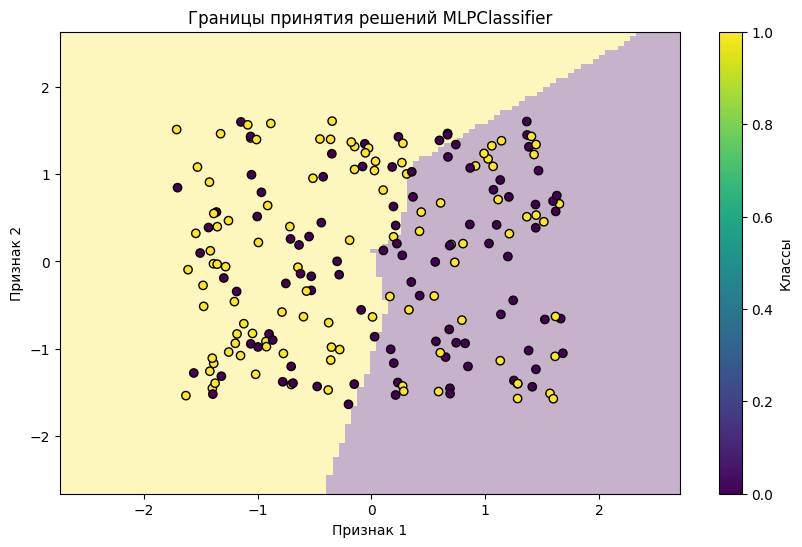

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Генерация примера данных
X = np.random.rand(200, 2)  # 200 образцов и 2 признака для визуализации
y = np.random.randint(0, 2, size=(200,))  # 200 меток классов (например, бинарная классификация)

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Создание и обучение модели
clf = MLPClassifier(hidden_layer_sizes=(6, 6, 6), max_iter=10_000, verbose=False)
clf.fit(X_train, y_train)

# Создание сетки для визуализации
X0 = np.linspace(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1, 100)
X1 = np.linspace(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1, 100)
X0_grid, X1_grid = np.meshgrid(X0, X1)

# Прогнозирование классов на сетке
y_predict = clf.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)

# Визуализация границ принятия решений
plt.figure(figsize=(10, 6))
plt.pcolormesh(X0_grid, X1_grid, y_predict, alpha=0.3, shading='auto')

# Отображение обучающих данных
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='black', linewidth=1)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Границы принятия решений MLPClassifier')
plt.colorbar(label='Классы')
plt.show()


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time

# Генерация данных для классификации
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Функция для обучения и оценки модели
def evaluate_model(neurons):
    model = MLPClassifier(hidden_layer_sizes=(neurons,), max_iter=1000, random_state=42)
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy, training_time

# Сравнение точности моделей с разным количеством нейронов
neurons_list = [1, 2, 10, 100]
results = {}

for neurons in neurons_list:
    accuracy, training_time = evaluate_model(neurons)
    results[neurons] = (accuracy, training_time)
    print(f"Нейронов: {neurons}, Точность: {accuracy:.4f}, Время обучения: {training_time:.4f} секунд")

# Вывод результатов
for neurons, (accuracy, training_time) in results.items():
    print(f"{neurons} нейронов: точность = {accuracy:.4f}, время обучения = {training_time:.4f} секунд")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Нейронов: 1, Точность: 0.8650, Время обучения: 1.9414 секунд
Нейронов: 2, Точность: 0.5000, Время обучения: 0.1827 секунд


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Нейронов: 10, Точность: 0.9750, Время обучения: 3.3295 секунд
Нейронов: 100, Точность: 1.0000, Время обучения: 4.6984 секунд
1 нейронов: точность = 0.8650, время обучения = 1.9414 секунд
2 нейронов: точность = 0.5000, время обучения = 0.1827 секунд
10 нейронов: точность = 0.9750, время обучения = 3.3295 секунд
100 нейронов: точность = 1.0000, время обучения = 4.6984 секунд


In [81]:
# Функция для оценки модели с несколькими скрытыми слоями
def evaluate_multi_layer_model(layers):
    model = MLPClassifier(hidden_layer_sizes=layers, max_iter=1000, random_state=42)
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy, training_time

# Сравнение точности моделей с разным количеством слоев
layers_list = [(2,), (3,), (10,)]
results_layers = {}

for layers in layers_list:
    accuracy, training_time = evaluate_multi_layer_model(layers)
    results_layers[layers] = (accuracy, training_time)
    print(f"Скрытые слои: {layers}, Точность: {accuracy:.4f}, Время обучения: {training_time:.4f} секунд")

# Вывод результатов
for layers, (accuracy, training_time) in results_layers.items():
    print(f"{layers} скрытых слоев: точность = {accuracy:.4f}, время обучения = {training_time:.4f} секунд")


Скрытые слои: (2,), Точность: 0.8700, Время обучения: 1.9543 секунд
Скрытые слои: (3,), Точность: 0.8700, Время обучения: 1.1968 секунд
Скрытые слои: (10,), Точность: 0.9750, Время обучения: 4.4391 секунд
(2,) скрытых слоев: точность = 0.8700, время обучения = 1.9543 секунд
(3,) скрытых слоев: точность = 0.8700, время обучения = 1.1968 секунд
(10,) скрытых слоев: точность = 0.9750, время обучения = 4.4391 секунд


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [82]:
# Создание глубокой модели
deep_model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=42)
deep_model.fit(X_train, y_train)

# Вывод весов и смещений
for i in range(len(deep_model.coefs_)):
    print(f"Слой {i + 1}: веса:\n{deep_model.coefs_[i]}\nСмещения:\n{deep_model.intercepts_[i]}")


Слой 1: веса:
[[-0.35983249  1.287684    0.8660363   0.18250848 -0.54129063 -0.96575448
  -0.50226167  0.34107045  0.14297406  0.2805905 ]
 [-0.49345772  0.80113484  0.13262202 -0.54573366 -0.34651454  0.0607869
  -0.32678792 -0.19600616 -0.27347754 -0.27776224]]
Смещения:
[ 0.47553902 -0.19658998 -0.81936052 -0.23187541  0.00398585  0.05815711
 -0.54373951  0.39595874  0.36449958 -0.65395533]
Слой 2: веса:
[[-1.36952456e-01 -1.60715187e-03 -1.04255190e-02  5.59993441e-01
   8.03184726e-01  6.72376118e-01 -1.43760386e-01 -6.76903988e-01
  -1.13087167e-01 -2.95994355e-01]
 [ 4.30109225e-01  8.68467579e-25 -1.53494798e-02  3.83762479e-01
  -6.88175734e-01 -1.77440894e-01  4.60567579e-01  5.60451538e-01
   7.12517422e-01  9.60594203e-02]
 [-3.03611053e-02  3.59880930e-04  1.10790283e-02  1.11621449e+00
   6.84808857e-01  1.29053700e+00 -1.05299233e+00 -9.57514251e-01
  -1.05472718e+00 -4.67999723e-01]
 [-2.51560656e-02 -5.98032266e-05  1.57977424e-03  1.17689289e-01
  -5.82348501e-02  7.5

In [83]:
# Создание большой модели
large_model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

start_time_large = time.time()
large_model.fit(X_train, y_train)
training_time_large = time.time() - start_time_large

predictions_large = large_model.predict(X_test)
accuracy_large = accuracy_score(y_test, predictions_large)

print(f"Большая модель: точность = {accuracy_large:.4f}, время обучения = {training_time_large:.4f} секунд")


Большая модель: точность = 1.0000, время обучения = 2.9902 секунд


In [84]:
from sklearn.datasets import load_iris

# Загрузка датасета Iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Обучение перцептрона на датасете Iris
perceptron_iris = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
perceptron_iris.fit(X_train_iris, y_train_iris)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

In [85]:
predictions_iris = perceptron_iris.predict(X_test_iris)
accuracy_iris = accuracy_score(y_test_iris, predictions_iris)

print(f"Точность модели на датасете Iris: {accuracy_iris:.4f}")


Точность модели на датасете Iris: 0.9667


In [87]:
!pip install scikit-learn pandas


In [98]:
import time
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Загрузка набора данных о домах в Калифорнии
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели регрессии
regressor = MLPRegressor(hidden_layer_sizes=(10,), max_iter=10000, random_state=1)
start_time = time.time()
regressor.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Оценка модели
y_pred = regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

# Вывод результатов
print(f"Время обучения: {training_time:.4f} секунд")
print(f"Среднеквадратичная ошибка: {mse:.4f}")


Время обучения: 14.2713 секунд
Среднеквадратичная ошибка: 0.3319


In [94]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Загрузка датасета Iris
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# Преобразование меток в one-hot encoding
encoder = OneHotEncoder(sparse_output=False)  # Изменено с sparse=False на sparse_output=False
y_encoded = encoder.fit_transform(y)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Обучающая выборка X:", X_train)
print("Обучающая выборка y (one-hot):", y_train)


Обучающая выборка X: [[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [5.5 4.2 1.4 0.2]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]
 [6.  2.2 4.  1. ]
 [5.4 3.  4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [5.5 2.3 4.  1.3]
 [5.4 3.9 1.7 0.4]
 [5.  2.3 3.3 1. ]
 [6.4 2.7 5.3 1.9]
 [5.  3.3 

In [95]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Обучение модели с использованием scikit-learn
sklearn_model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42)
sklearn_model.fit(X_train, y_train)

# Прогнозирование и оценка точности
sklearn_predictions = sklearn_model.predict(X_test)
sklearn_accuracy = accuracy_score(y_test.argmax(axis=1), sklearn_predictions.argmax(axis=1))

print(f"Точность модели scikit-learn: {sklearn_accuracy:.4f}")


Точность модели scikit-learn: 0.9667


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [96]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Функция для создания и обучения модели Keras
def create_keras_model(activation, optimizer):
    model = keras.Sequential([
        layers.Dense(10, activation=activation, input_shape=(X_train.shape[1],)),
        layers.Dense(3, activation='softmax')  # 3 класса для Iris
    ])

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Список функций активации и оптимизаторов для эксперимента
activations = ['relu', 'sigmoid', 'tanh']
optimizers = ['adam', 'sgd']

results = {}

for activation in activations:
    for optimizer in optimizers:
        model = create_keras_model(activation, optimizer)

        # Обучение модели
        model.fit(X_train, y_train, epochs=100, verbose=0)

        # Оценка модели
        keras_loss, keras_accuracy = model.evaluate(X_test, y_test, verbose=0)

        results[(activation, optimizer)] = keras_accuracy

# Вывод результатов
for (activation, optimizer), accuracy in results.items():
    print(f"Функция активации: {activation}, Оптимизатор: {optimizer}, Точность: {accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Функция активации: relu, Оптимизатор: adam, Точность: 0.7000
Функция активации: relu, Оптимизатор: sgd, Точность: 0.9667
Функция активации: sigmoid, Оптимизатор: adam, Точность: 0.8667
Функция активации: sigmoid, Оптимизатор: sgd, Точность: 0.8000
Функция активации: tanh, Оптимизатор: adam, Точность: 0.9667
Функция активации: tanh, Оптимизатор: sgd, Точность: 0.8333
